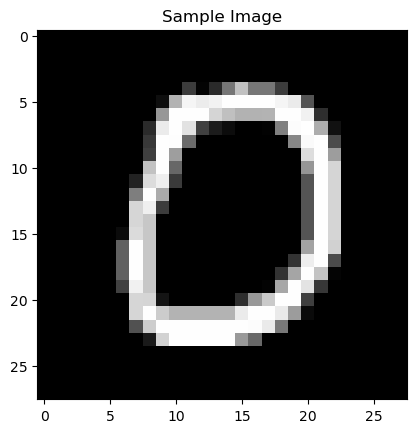

1/1 [==============================] - 0s 43ms/step


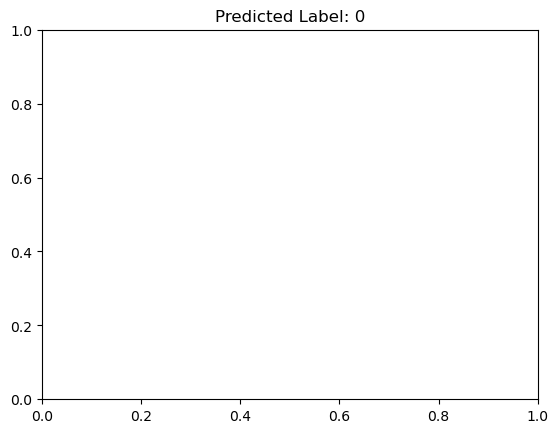

Epoch 1/5
1688/1688 [==============================] - 23s 13ms/step - loss: 0.1600 - accuracy: 0.9502 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 2/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0364 - val_accuracy: 0.9902
Epoch 3/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0389 - val_accuracy: 0.9897
Epoch 4/5
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0271 - accuracy: 0.9914 - val_loss: 0.0318 - val_accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0340 - accuracy: 0.9893
test_images, test_labels
Test accuracy: 0.989300012588501


In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

import matplotlib.pyplot as plt

# Display a sample image
sampleNumber = 10  # Change this to any valid sample index
sampleImage = test_images[sampleNumber]
plt.imshow(sampleImage.squeeze(), cmap='gray')  # 'squeeze' is used to remove single-dimensional entries from the shape of an array
plt.title('Sample Image')
plt.show()

# Predict the label of the sample image
sampleImageArray = sampleImage.reshape(1, 28, 28, 1)  # Reshape the image to fit the model input
predictions = model.predict(sampleImageArray)
predictedLabel = predictions.argmax()
plt.title(f'Predicted Label: {predictedLabel}')
plt.show()

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_images, test_labels")
print(f"Test accuracy: {test_acc}")